# Analisis Exploratorio del set de datos

In [13]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#Load the Data and take a quick look
trocafone = pd.read_csv('events.csv', low_memory=False)
trocafone.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,8512.0,Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,8527.0,Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Information about the dataset
trocafone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [16]:
# Some stats about the numeric columns in our dataset
trocafone.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [17]:
# Name of columns
trocafone.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [18]:
trocafone.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [19]:
events = trocafone['event']
print(events.size == events.count())

True


In [20]:
events_vc = trocafone['event'].value_counts()
events_vc

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

### Eventos generados por usuarios

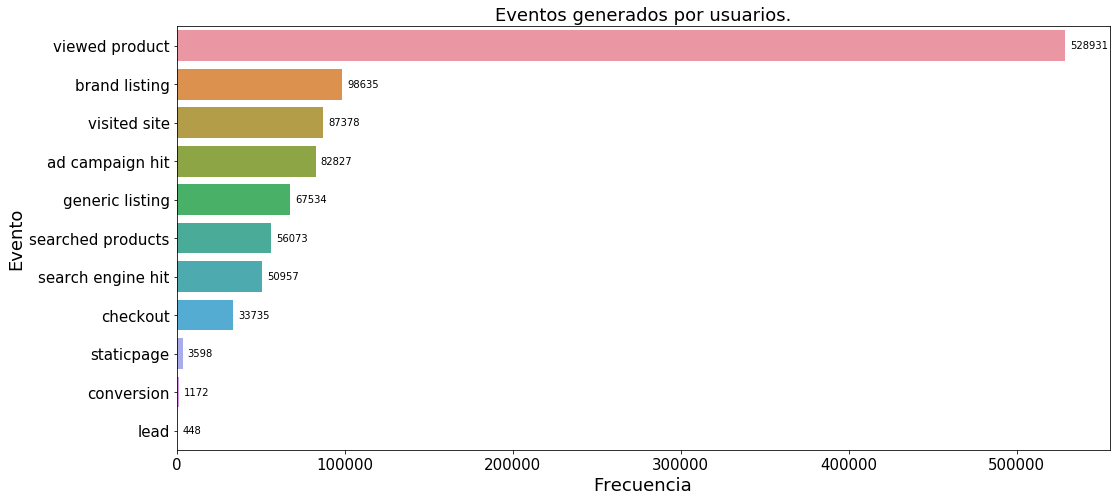

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=events_vc.values, y=events_vc.index)
ax.set_title("Eventos generados por usuarios.", fontsize=18)
ax.set_xlabel("Frecuencia", fontsize=18)
ax.set_ylabel("Evento", fontsize=18)
fig.tight_layout()
plt.xticks(size = 15)
plt.yticks(size = 15)


rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = x_value.astype(int)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)         

### Modelos mas vendidos

In [22]:
#Top Models 
grouped = trocafone.groupby('event')
compras = grouped.get_group('conversion')
top_compras = compras['model'].value_counts().head(20)

In [23]:
top_compras

Samsung Galaxy J5                    88
iPhone 5s                            84
iPhone 6                             71
Samsung Galaxy S6 Flat               39
iPhone 6S                            37
iPhone 5c                            33
Motorola Moto G4 Plus                30
Motorola Moto G3 4G                  30
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Samsung Galaxy J7 Prime              20
Samsung Galaxy Note 4                19
Samsung Galaxy Gran Prime 3G Duos    18
Samsung Galaxy S5                    18
Samsung Galaxy S7                    18
iPhone SE                            17
Samsung Galaxy S3 Mini               17
Samsung Galaxy S7 Edge               17
iPhone 5                             17
Name: model, dtype: int64

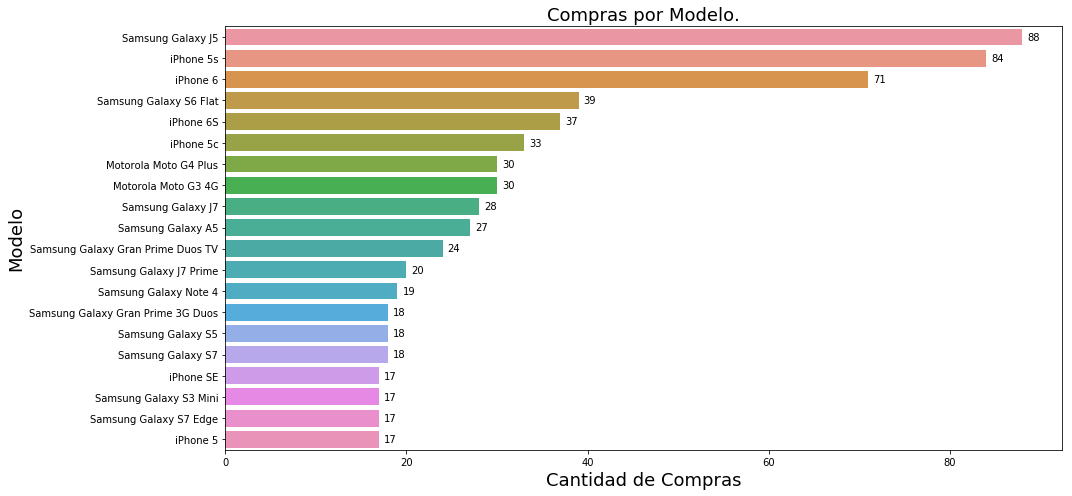

In [24]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x = top_compras.values , y = top_compras.index)
ax.set_title("Compras por Modelo.", fontsize=18)
ax.set_xlabel("Cantidad de Compras", fontsize=18)
ax.set_ylabel("Modelo", fontsize=18)
fig.tight_layout()
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = x_value.astype(int)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)  

### Cantidad de eventos por tipo de dispositivo

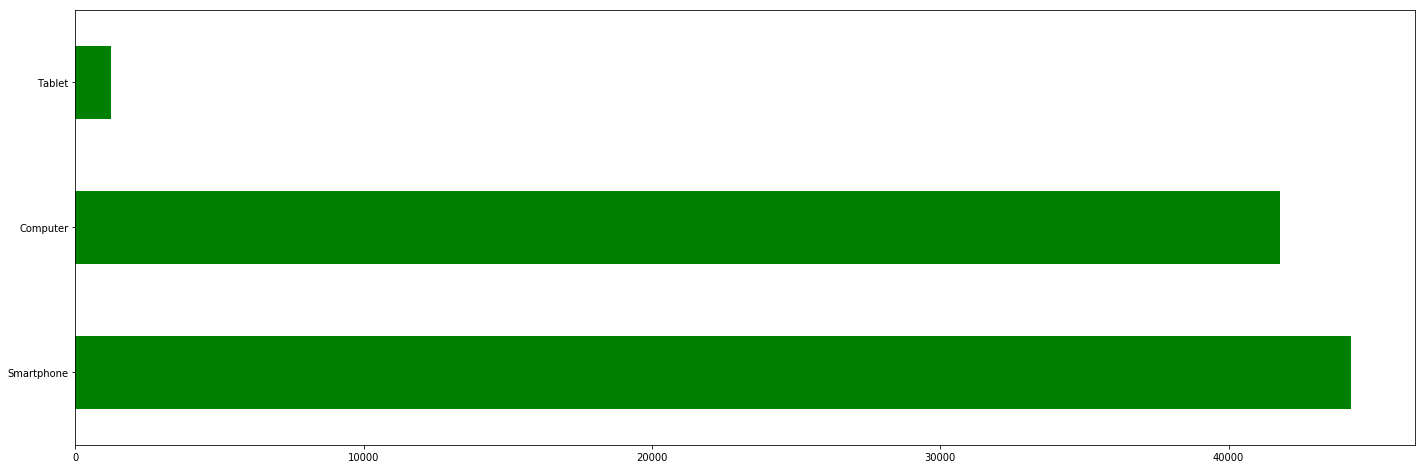

In [25]:
device_types=trocafone[(trocafone['device_type']!='Unknown') & (trocafone['device_type'].notnull())]
device_types['device_type'].value_counts().plot(kind='barh',rot=0,figsize=(24,8),color='green') 

In [26]:
device_types['event'].nunique()
#No hay datos sobre tipos de dispositivos con otros eventos

1

### Distribucion de eventos por hora

Text(0.5,1,'Amount of events during the day by hour')

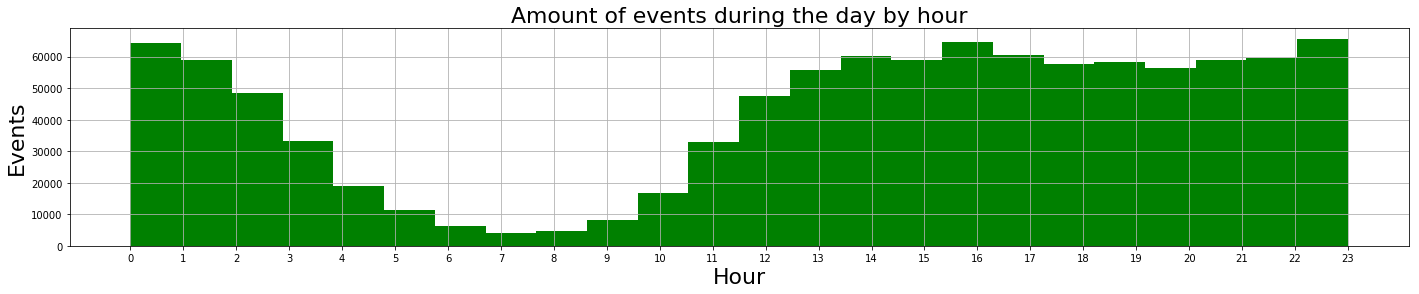

In [27]:
# Convert Date
import calendar
trocafone['timestamp'] = pd.to_datetime(trocafone['timestamp'])
trocafone['Hour'] = pd.to_datetime(trocafone['timestamp'], format='%H:%M',errors='coerce').dt.hour
trocafone['Hour'].hist(figsize=(24,4),bins=24,color='green')
plt.xticks(range(24))
plt.xlabel('Hour',fontsize='22')
plt.ylabel('Events',fontsize='22')
plt.title("Amount of events during the day by hour",fontsize='22')

### Tipos de eventos por hora

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

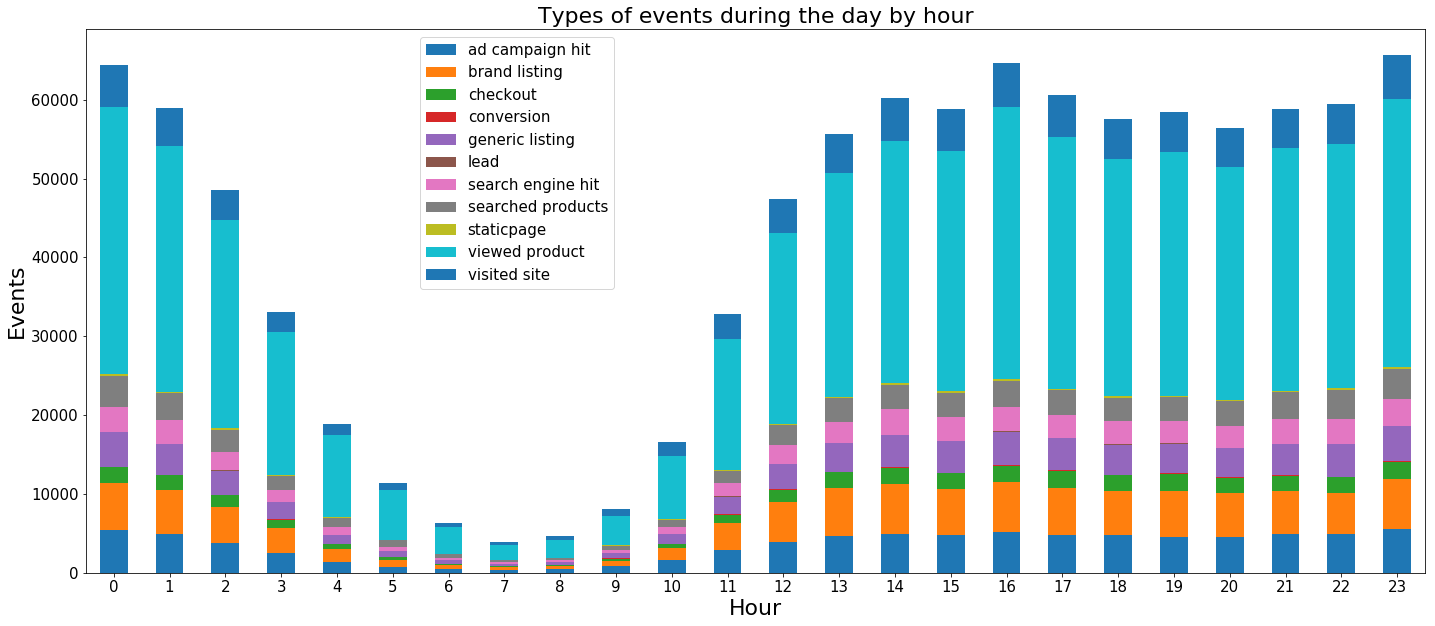

In [28]:
trocafone.groupby(['Hour','event']).size().unstack().plot(kind='bar',stacked=True,figsize=(24,10),rot=0).legend(bbox_to_anchor=(0.4, 1.00),prop={'size': 15})
plt.xlabel('Hour',fontsize='22')
plt.ylabel('Events',fontsize='22')
plt.title("Types of events during the day by hour",fontsize='22')
plt.xticks(size = 15)
plt.yticks(size = 15)


### Distribucion de eventos por dia de la semana

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]), <a list of 10 Text yticklabel objects>)

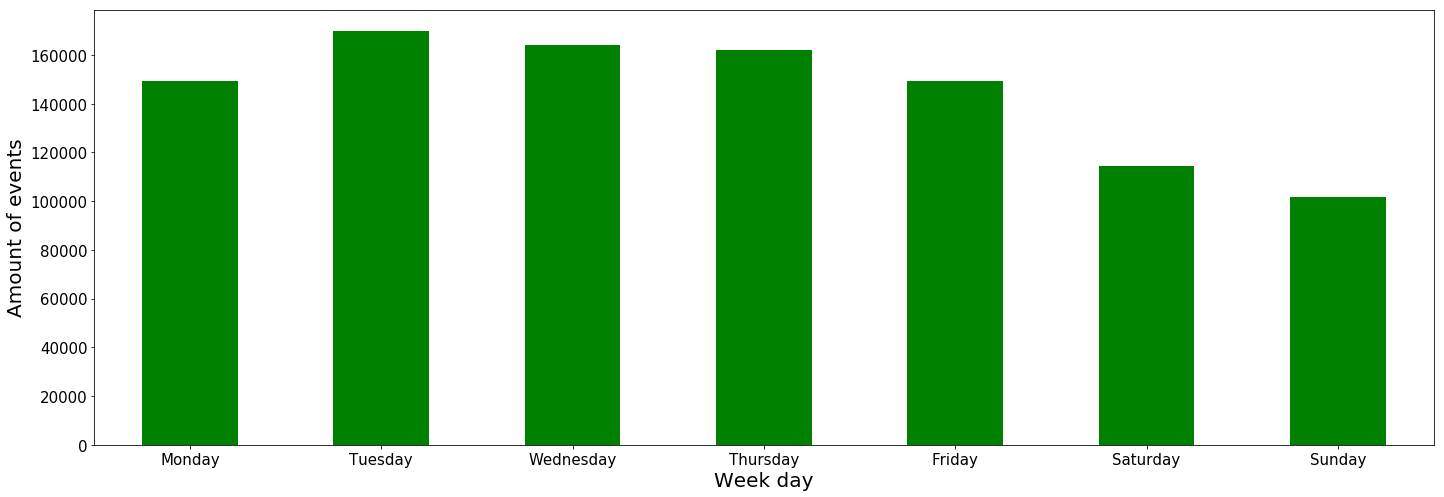

In [29]:
#Create a column with days of the week
trocafone['timestamp'] = pd.to_datetime(trocafone['timestamp'])
trocafone['day_of_week'] = trocafone['timestamp'].dt.weekday_name
trocafone['day_of_week'] = pd.Categorical(trocafone['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
events_by_day = trocafone['day_of_week'].value_counts().sort_index()
events_by_day.plot(kind='bar',figsize=(24,8),rot=0, color='green')
plt.xlabel('Week day',fontsize=20)
plt.ylabel('Amount of events',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Distribucion de compras por dia de la semana

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

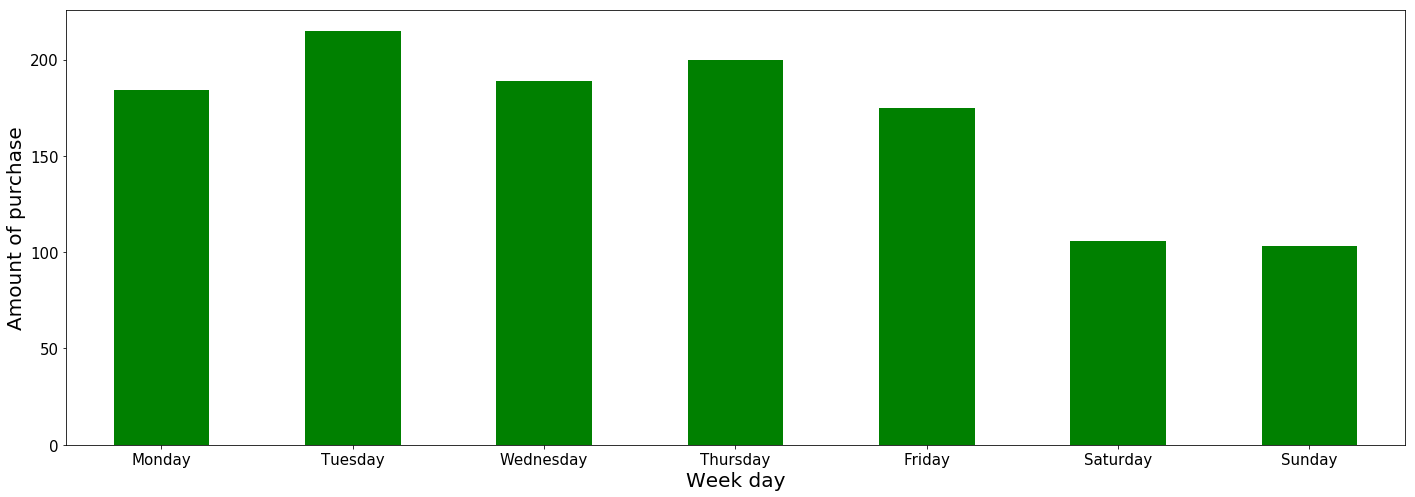

In [30]:
conv=trocafone.loc[trocafone['event']=='conversion']
events_by_day = conv['day_of_week'].value_counts().sort_index()
events_by_day.plot(kind='bar',figsize=(24,8),rot=0, color='green')
plt.xlabel('Week day',fontsize=20)
plt.ylabel('Amount of purchase',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

### Evolución de la cantidad de eventos a lo largo del año

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

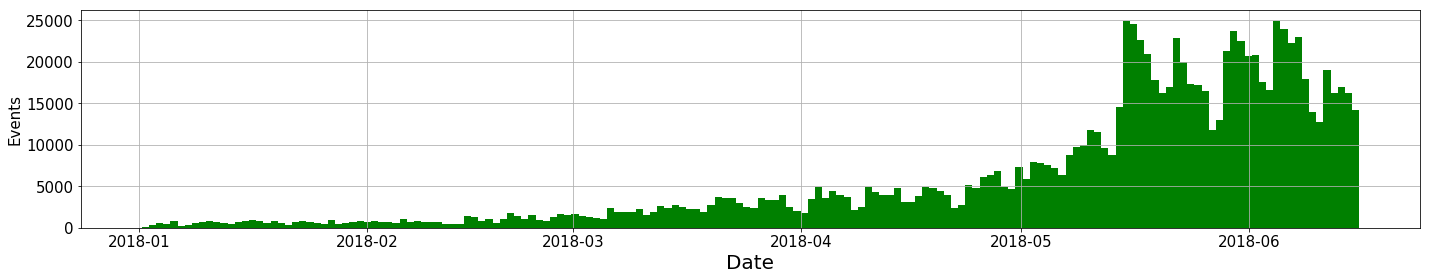

In [31]:
ordeano_por_fecha=trocafone.sort_values(by='timestamp')
ordeano_por_fecha['timestamp'].hist(figsize=(24,4),bins=170,color='green')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Events',fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15) 

### Evolución de la cantidad de compras a lo largo del año

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

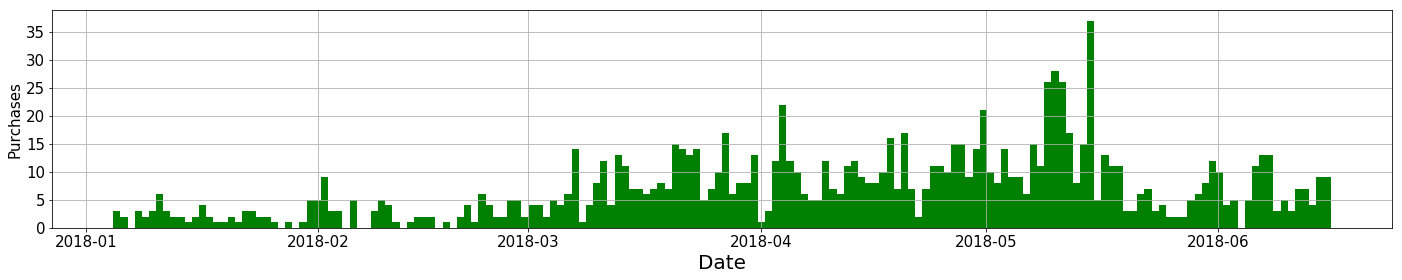

In [32]:
ordeano_por_fecha=trocafone.loc[trocafone["event"] == "conversion"].sort_values(by='timestamp')
ordeano_por_fecha['timestamp'].hist(figsize=(24,4),bins=170,color='green')
plt.xlabel('Date',fontsize=20)
plt.ylabel('Purchases',fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15) 

### Evolución de la cantidad de eventos a lo largo del mes

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 <a list of 7 Text yticklabel objects>)

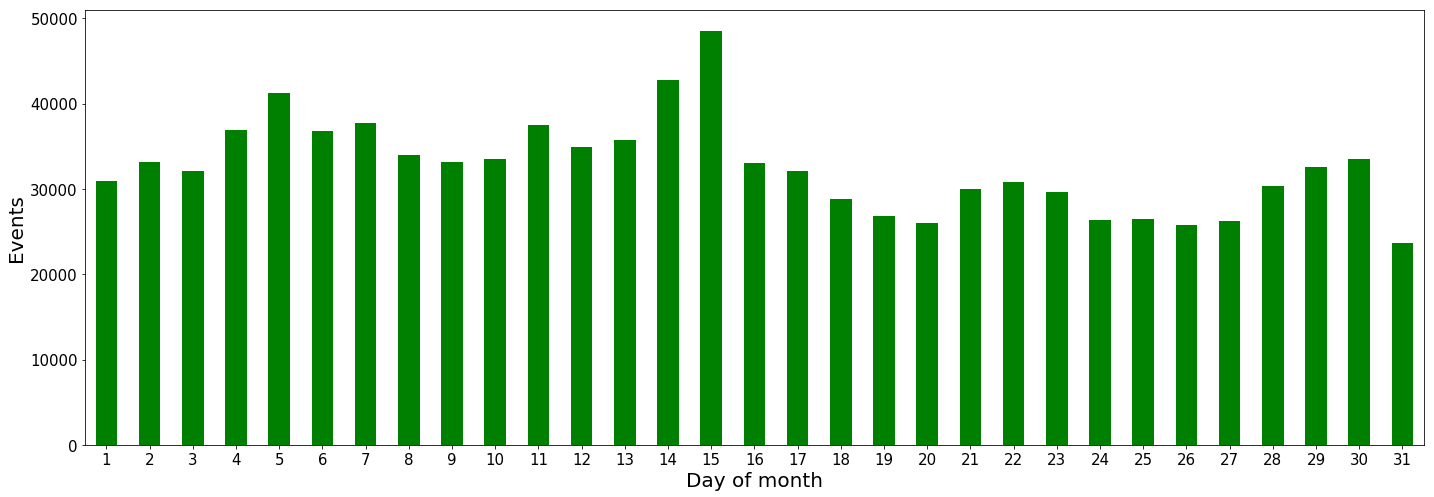

In [33]:
trocafone["day"] = trocafone['timestamp'].map(lambda x: x.day)
events_by_day = trocafone["day"].value_counts().sort_index()
events_by_day.plot(kind='bar',figsize=(24,8),rot=0, color='green')
plt.xlabel('Day of month',fontsize=20)
plt.ylabel('Events',fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15) 

### Paises con mas usuarios

In [34]:
countries = trocafone.loc[trocafone["country"] != "Unknown"]
countries = countries.drop_duplicates(subset=['person', 'country'])
countries = countries["country"].value_counts().to_frame("cantidad")
countries.index.title = "pais"
countries = countries.assign(porcentaje=countries/countries.sum()*100)
countries.head(10)

,cantidad,porcentaje
Brazil,25872,98.215777
United States,322,1.222383
Argentina,25,0.094905
Canada,20,0.075924
Netherlands,10,0.037962
France,10,0.037962
Mozambique,9,0.034166
United Kingdom,8,0.030370
Portugal,7,0.026574
Italy,5,0.018981


### Ciudades con mas usuarios

In [35]:
cities = trocafone.loc[trocafone["city"] != "Unknown"]
cities = cities.drop_duplicates(subset=['person', 'city'])
cities = cities["city"].value_counts().to_frame("cantidad")
cities.index.title = "ciudad"
cities = cities.assign(porcentaje=cities/cities.sum()*100)
cities.head(10)

,cantidad,porcentaje
São Paulo,4297,14.783596
Rio de Janeiro,1379,4.744375
Belo Horizonte,938,3.227138
Salvador,932,3.206496
Brasília,535,1.840639
Curitiba,441,1.517237
Fortaleza,429,1.475951
Osasco,403,1.386500
Recife,386,1.328012
Porto Alegre,375,1.290167


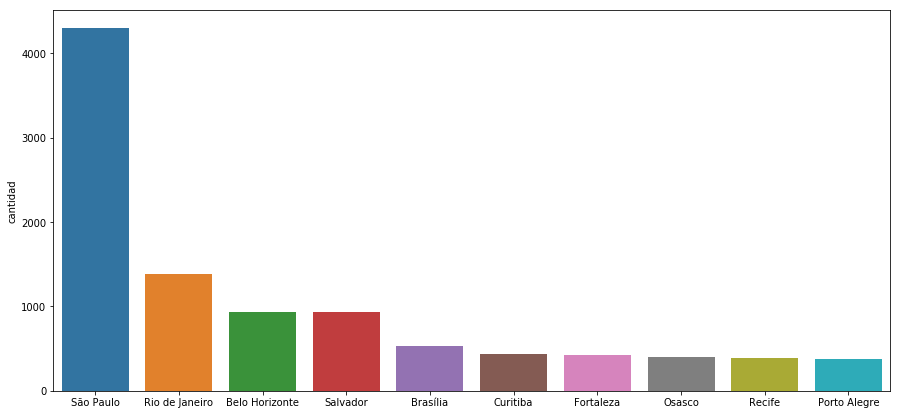

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=cities.head(10).index, y=cities.head(10)["cantidad"])

### Paises con mas eventos

In [37]:
countries = trocafone.loc[trocafone["country"] != "Unknown"]
countries = countries["country"].value_counts().to_frame("cantidad")
countries.index.title = "pais"
countries = countries.assign(porcentaje=countries/countries.sum()*100)
countries.head(10)

,cantidad,porcentaje
Brazil,84308,99.110092
United States,465,0.546641
Argentina,94,0.110504
Canada,35,0.041145
Netherlands,13,0.015282
France,13,0.015282
Mozambique,12,0.014107
United Kingdom,12,0.014107
Japan,11,0.012931
Poland,9,0.010580


### Ciudades con mas eventos

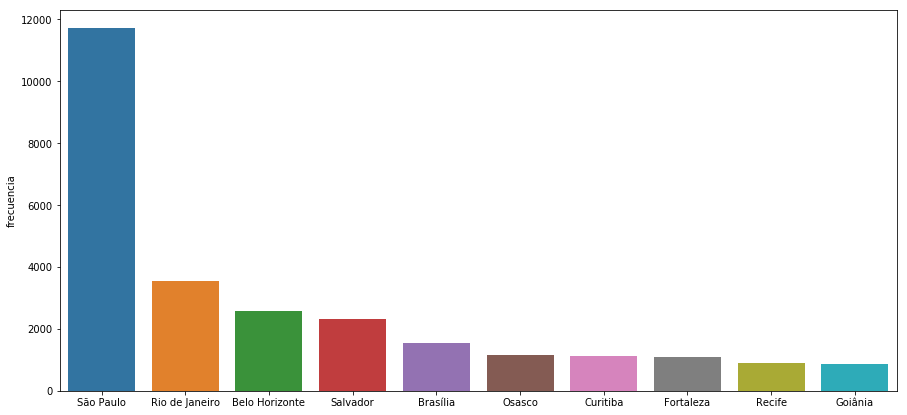

In [38]:
cities = trocafone.loc[trocafone["city"] != "Unknown"]
cities = cities["city"].value_counts().to_frame("frecuencia")
cities.index.title = "ciudad"
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=cities.head(10).index, y=cities.head(10)["frecuencia"])

In [39]:
cities_loc = pd.read_csv("coordinates.csv")
cities_loc = cities_loc.dropna()

In [40]:
import folium

cm = plt.get_cmap("winter")

folium_map = folium.Map(tiles="Mapbox Bright", location=(0,0), zoom_start=2.47)

for city in cities_loc.values:
    marker = folium.CircleMarker(location=[city[2], city[3]], radius=1, color='red', opacity=0.5)
    marker.add_to(folium_map)
folium_map.zoom_control = False
folium_map

### Cantidad de eventos por usuario

In [41]:
eventos_por_persona = trocafone.groupby('person')['event'].count()
max = eventos_por_persona.max()
min = eventos_por_persona.min()
promedio = eventos_por_persona.mean()
media = eventos_por_persona.median()
std = eventos_por_persona.std()
d = {"promedio":promedio, "media":media, "std":std, "max":max, "min":min}
pd.DataFrame(data=d, index=["eventos por persona"])

,promedio,media,std,max,min
eventos por persona,36.609036,14.0,80.595628,2771,1
